## Importing Liabraries

In [45]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,STOPWORDS
from bs4 import BeautifulSoup
import re,string,unicodedata

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from xgboost.sklearn import XGBClassifier

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense,Input, Embedding,LSTM,Dropout,Conv1D, MaxPooling1D, GlobalMaxPooling1D,Dropout,Bidirectional,Flatten,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
import transformers
import tokenizers



## Data preprocessing

In [46]:
df= pd.read_csv('D:/Winter 2022/SMA/Project/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [47]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [48]:
# Finding Duplicates in the data
num_duplicates = df.duplicated().sum()
print(f"the number of duplicates in the the data", format(num_duplicates))

the number of duplicates in the the data 418


Let' see the duplicate reviews

In [49]:
review = df['review']
duplicate_review = df[review.isin(review[review.duplicated()])].sort_values('review')
duplicate_review.head()

,review,sentiment
34058,"""Go Fish"" garnered Rose Troche rightly or wron...",negative
47467,"""Go Fish"" garnered Rose Troche rightly or wron...",negative
29956,"""Three"" is a seriously dumb shipwreck movie. M...",negative
31488,"""Three"" is a seriously dumb shipwreck movie. M...",negative
47527,"""Witchery"" might just be the most incoherent a...",negative


In [50]:
# dropping the duplicate values
df.drop_duplicates(inplace =True)

In [51]:
# Converting the text values of sentiments into numbers 
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
df['sentiment']= label_encoder.fit_transform(df['sentiment'])

## Cleaning the data


In [52]:
stop = stopwords.words('english')
wl = WordNetLemmatizer()

In [53]:
mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
           "'cause": "because", "could've": "could have", "couldn't": "could not", 
           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
           "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", 
           "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", 
           "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
           "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", 
           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have",
           "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
           "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
           "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
           "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
           "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", 
           "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
           "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
           "she's": "she is", "should've": "should have", "shouldn't": "should not", 
           "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is",
           "that'd": "that would", "that'd've": "that would have", "that's": "that is", 
           "there'd": "there would", "there'd've": "there would have", "there's": "there is", 
           "here's": "here is","they'd": "they would", "they'd've": "they would have", 
           "they'll": "they will", "they'll've": "they will have", "they're": "they are", 
           "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", 
           "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
           "we're": "we are", "we've": "we have", "weren't": "were not", 
           "what'll": "what will", "what'll've": "what will have","what're": "what are",  
           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", 
           "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
           "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", 
           "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", 
           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
           "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have",
           "y'all're": "you all are","y'all've": "you all have","you'd": "you would", 
           "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", 
           "you're": "you are", "you've": "you have" }

In [54]:
#function to clean data
from bs4 import BeautifulSoup
import re,string,unicodedata
def clean_text(text,lemmatize = True):
    soup = BeautifulSoup(text, "html.parser") #remove html tags
    text = soup.get_text()
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")]) #expanding chatwords and contracts clearing contractions
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_clean.sub(r'',text)
    text = re.sub(r'\.(?=\S)', '. ',text) #add space after full stop
    text = re.sub(r'http\S+', '', text) #remove urls
    text = "".join([word.lower() for word in text if word not in string.punctuation]) #remove punctuation
    #tokens = re.split('\W+', text) #create tokens
    if lemmatize:
        text = " ".join([wl.lemmatize(word) for word in text.split() if word not in stop and word.isalpha()]) #lemmatize
    else:
        text = " ".join([word for word in text.split() if word not in stop and word.isalpha()]) 
    return text

In [55]:
data_copy = df.copy()

In [56]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\GG\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [57]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [58]:
df['review']=df['review'].apply(clean_text,lemmatize = True)

C:\Users\GG\miniconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [59]:
df.head()

,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake think zombie ...,0
4,petter matteis love time money visually stunni...,1


## Data analysis

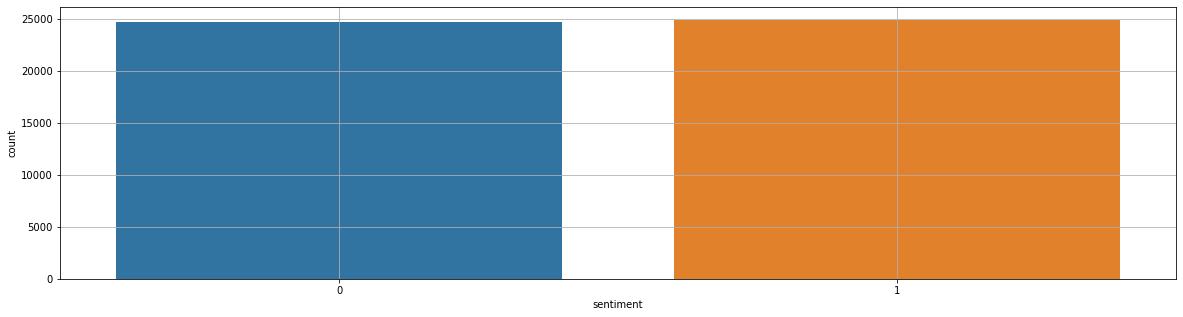

In [60]:
sns.countplot(x=df['sentiment'])
plt.grid()


In [61]:
print(f"There are about",df['sentiment'].value_counts()[0],"Positive reviews i.e.", round((df["sentiment"].value_counts()[0]/len(df["sentiment"])) * 100,2), "% of the dataset")
print(f"There are about",df['sentiment'].value_counts()[1],"Negative reviews i.e.", round((df["sentiment"].value_counts()[1]/len(df["sentiment"]))*100,2),"% of the dataset")

There are about 24698 Positive reviews i.e. 49.81 % of the dataset
There are about 24884 Negative reviews i.e. 50.19 % of the dataset


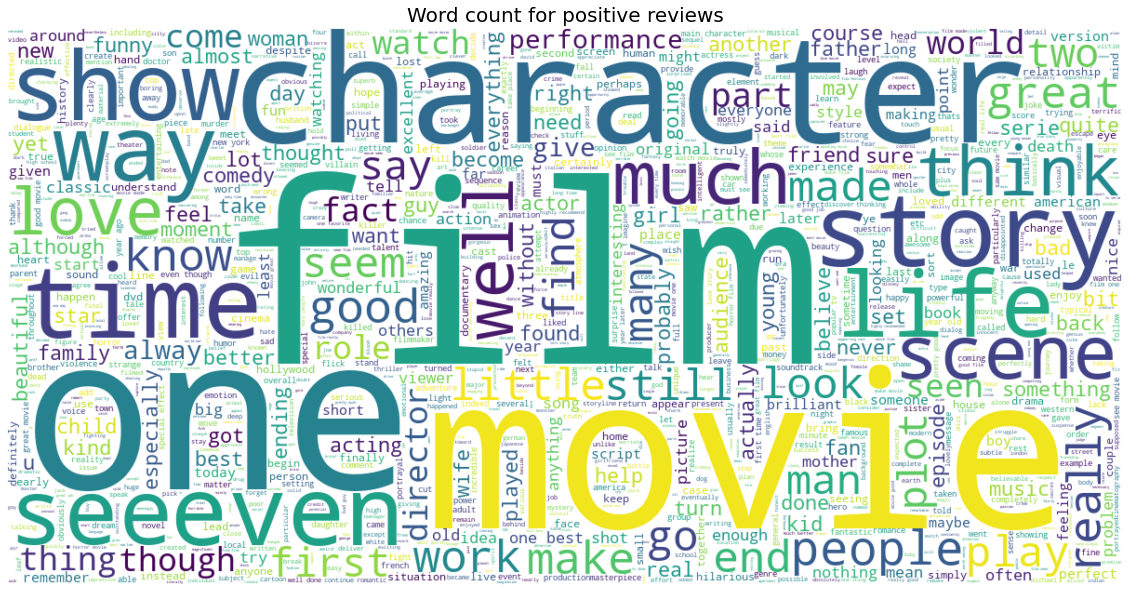

In [62]:
from wordcloud import WordCloud
positive_review = df[df.sentiment == 1]["review"]
positive_review_string = ' '.join(positive_review)
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=1200,width = 1200, height=600,background_color= "white").generate(positive_review_string)
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.title("Word count for positive reviews",fontsize=20)
plt.show()

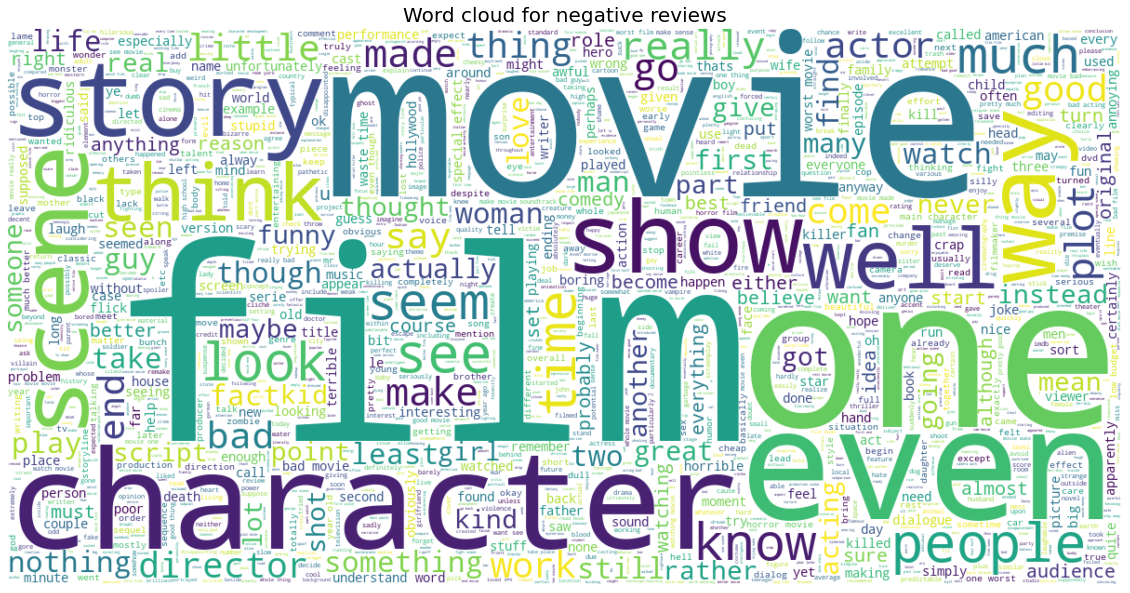

In [63]:
negative_data = df[df.sentiment == 0]['review']
negative_data_string = ' '.join(negative_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(negative_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for negative reviews',fontsize = 20)
plt.show()


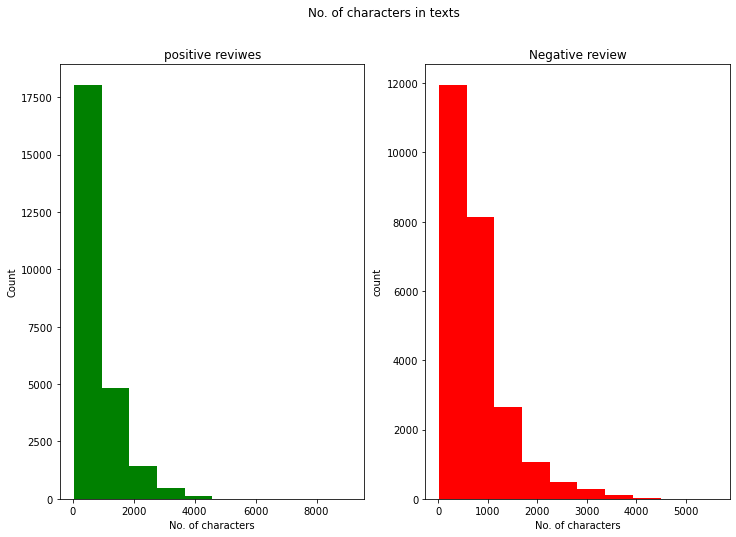

In [64]:
fig,(ax1,ax2) =plt.subplots(1,2,figsize=(12,8))
text_len = positive_review.str.len()
ax1.hist(text_len,color='green')
ax1.set_title("positive reviwes")
ax1.set_xlabel("No. of characters")
ax1.set_ylabel("Count")
text_len = negative_data.str.len()
ax2.hist(text_len,color="red")
ax2.set_title("Negative review")
ax2.set_xlabel("No. of characters")
ax2.set_ylabel("count")
fig.suptitle("No. of characters in texts")
plt.show()

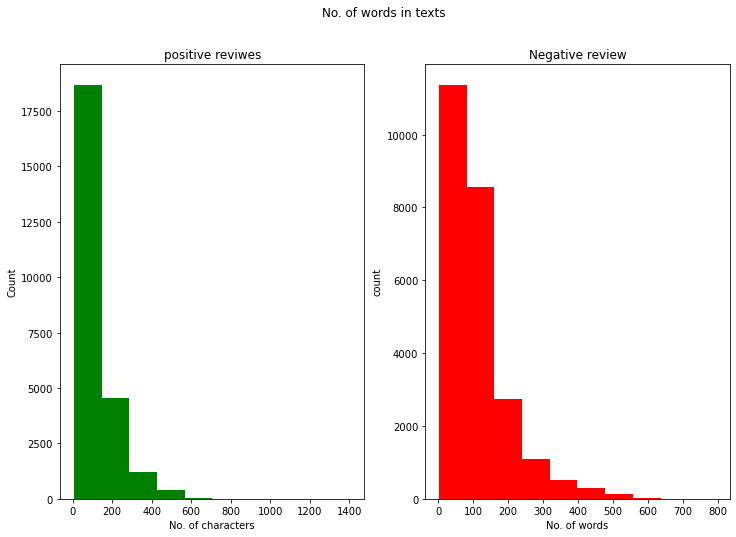

In [65]:
fig,(ax1,ax2) =plt.subplots(1,2,figsize=(12,8))
text_len = positive_review.str.split().map(lambda x: len(x))
ax1.hist(text_len,color='green')
ax1.set_title("positive reviwes")
ax1.set_xlabel("No. of characters")
ax1.set_ylabel("Count")
text_len = negative_data.str.split().map(lambda x: len(x))
ax2.hist(text_len,color="red")
ax2.set_title("Negative review")
ax2.set_xlabel("No. of words")
ax2.set_ylabel("count")
fig.suptitle("No. of words in texts")
plt.show()

In [66]:
def get_corpus(data):
    corpus = []
    for i in data:
        for j in i.split():
            corpus.append(j.strip())
    return corpus
corpus = get_corpus(df.review)
corpus[:5]
    
            

['one', 'reviewer', 'mentioned', 'watching', 'oz']

In [67]:
from collections import Counter
count = Counter(corpus)
most_words = count.most_common(10)
most_common = pd.DataFrame(most_words,columns=["words","count_"])
most_common

,words,count_
0,movie,100605
1,film,91130
2,one,53525
3,like,39746
4,time,30091
5,would,30037
6,good,28905
7,character,27801
8,story,24600
9,even,24440


In [68]:
# Sorting 
most_common= most_common.sort_values('count_')

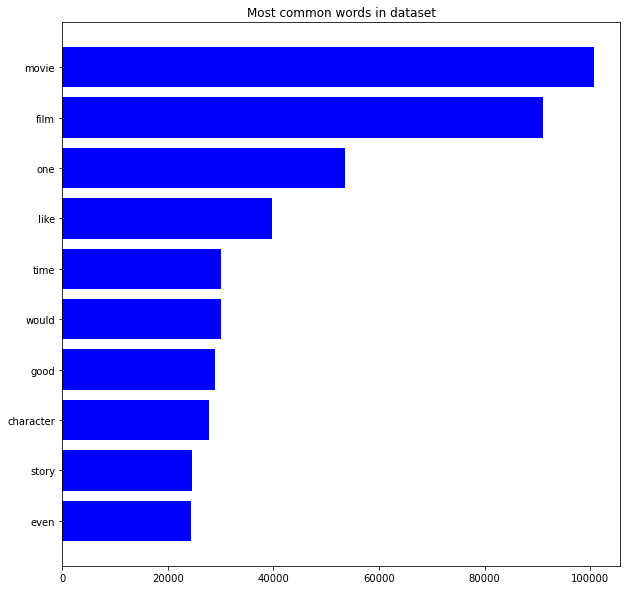

In [69]:
plt.figure(figsize=(10,10))
plt.yticks(range(len(most_common)),list(most_common.words))
plt.barh(range(len(most_common)),list(most_common.count_),align='center',color = 'blue')
plt.title("Most common words in dataset")
plt.show()

## Text preprocessing

1. Convertin text reviews into lowercase

In [70]:
def convert_lowercase(column):
    column = column.str.lower()
    return column

In [71]:
print(f"Before applying lower casing: {df['review'][0][:10]}")

df['review'] = convert_lowercase(df['review'])

print(f"After applying lower casing : {df['review'][0][:10]}")

Before applying lower casing: one review
After applying lower casing : one review


## Removing the HTML tags

In [72]:
import re
def remove_html_tags(text):
    re_html = re.compile('<.*?>')
    return re_html.sub(r'', text)

In [73]:
text = '<h1> This is a h1 tag </h1>'
print(remove_html_tags(text))

 This is a h1 tag 


In [74]:
print(f"Before removing HTML tags: {df['review'][1][:70]}")
df['review'] = df['review'].apply(remove_html_tags)
print(f"After removing HTML tags : {df['review'][1][:70]}")

Before removing HTML tags: wonderful little production filming technique unassuming oldtimebbc fa
After removing HTML tags : wonderful little production filming technique unassuming oldtimebbc fa


## Removing URL's

In [75]:
text = 'My profile link: https://www.google.com'
def remove_url(text):
    re_url = re.compile('https?://\S+|www\.\S+')
    return re_url.sub('', text)

In [76]:
print(f'Text before removing URL: {text}')
print(f'Text after removing URL : {remove_url(text)}')

Text before removing URL: My profile link: https://www.google.com
Text after removing URL : My profile link: 


In [77]:
from sklearn.model_selection import train_test_split
train_text, test_text, train_labels, test_labels = train_test_split(df["review"],df["sentiment"], test_size=0.33)


In [78]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Creates and fits a TensorFlow Tokenizer
tokenizer = Tokenizer(num_words=10_000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_text)

#Creates sequences of numeric representations of words
training_sequences = tokenizer.texts_to_sequences(train_text)
#pads sequences so they all have the same length
training_sequences = pad_sequences(training_sequences, maxlen=20)

#Process test data in the same way for later evaluation
testing_sequences = tokenizer.texts_to_sequences(test_text)
testing_sequences = pad_sequences(testing_sequences, maxlen=20)

        
#prints a sample of the new sequences
print('PROCESSED TEXT DATA')
print('=========================')
for i in range(5):
    print(training_sequences[i], '\n')


PROCESSED TEXT DATA
[ 421 2703 1423  607  118 6110 3990   11  160 3325 3545  159  473  359
   52 1289 2874    1    1  529] 

[  28    2  469  569   65 1067   82    7   82   85   85   42  220 3268
 2114  211    4 2921  393 6236] 

[  77    1  262    9 5627    1  801   77  842  423  997 1582   34  102
    2   73 2034   99  275  350] 

[  26  129  600  450 3257  420  297   55    3  116    8   12   91  166
    7   15  303    3  619  907] 

[2519 2741  236 1369  704 6793   59   10    1 7510    1    2   19   31
    1    1   23 2235  148    2] 



In [79]:
train_labels.reset_index(inplace=True, drop=True)

## Custom Callback

In [80]:
from tensorflow.keras.callbacks import Callback

class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.95:
            print("Accuracy over 95%... Stopping training")
            self.model.stop_training = True

my_callback = CustomCallback()

## Pre defined Callbacks


In [81]:
from tensorflow.keras.callbacks import LearningRateScheduler

#creates a function that updates the learning rate based on the epoch number
def scheduler(epoch, lr):
    if epoch < 2:
        return 0.01
    else:
        return lr * 0.99

lr_scheduler = LearningRateScheduler(scheduler)

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam

#input dimensions is equal to number of words tokenized (defined above)
input_dim = 10_000
# input length will be the length of our padded sequences
input_length = 20


#defines a text classifier model
model = Sequential([
    Embedding(input_dim=input_dim, output_dim=64, input_length=input_length),
    Bidirectional(LSTM(150)),
    Dropout(0.4),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 64)            640000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 300)              258000    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 300)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               154112    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                      

In [83]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
df['sentiment']= label_encoder.fit_transform(df['sentiment'])

In [84]:
history = model.fit(
    np.array(training_sequences), #must convert to numpy array before sending to model
    np.array(train_labels),       #must convert to numpy array before sending to model
    epochs=100, 
    batch_size=128,                
    callbacks=[my_callback, lr_scheduler],verbose=1)

Epoch 1/100
260/260 [==============================] - 22s 68ms/step - loss: 0.5016 - accuracy: 0.7568 - lr: 0.0100
Epoch 2/100
260/260 [==============================] - 18s 68ms/step - loss: 0.3649 - accuracy: 0.8423 - lr: 0.0100
Epoch 3/100
260/260 [==============================] - 18s 68ms/step - loss: 0.2619 - accuracy: 0.8934 - lr: 0.0099
Epoch 4/100
260/260 [==============================] - 18s 69ms/step - loss: 0.1795 - accuracy: 0.9293 - lr: 0.0098
Epoch 5/100
260/260 [==============================] - 21s 81ms/step - loss: 0.1288 - accuracy: 0.9505 - lr: 0.0097


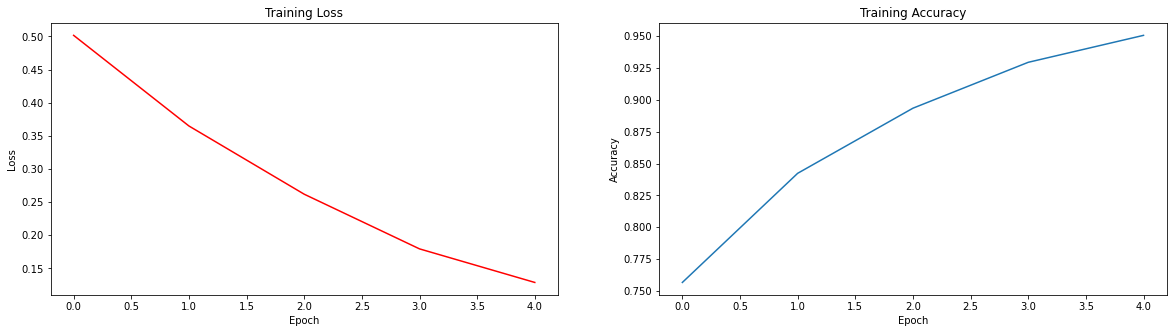

In [85]:
#Plots history of model training
plt.rcParams["figure.figsize"] = (20,5)
fig, axs = plt.subplots(1, 2)

axs[0].plot(history.history['loss'], color='red')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title('Training Loss')

axs[1].plot(history.history['accuracy'])
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Training Accuracy')

plt.show()

In [86]:
NEW_REVIEW =\
"""
This movie was garbage. I wish I never came to the theater to watch it.
"""

In [87]:
#Process the new review the same way the test text was processed
new_review_sequence = tokenizer.texts_to_sequences([NEW_REVIEW])
new_review_sequence = pad_sequences(new_review_sequence, maxlen=20)

#sends new review to be predicted by the model
new_review_prediction = round(model.predict(np.array(new_review_sequence))[0][0])
sentiment = "NEGATIVE" if new_review_prediction == 0 else "POSITIVE"

#displays what the model thinks the sentiment of the review was
print("MOVIE REVIEW:", NEW_REVIEW)
print("MODEL PREDICTED SENTIMENT:", sentiment)

1/1 [==============================] - 1s 928ms/step
MOVIE REVIEW: 
This movie was garbage. I wish I never came to the theater to watch it.

MODEL PREDICTED SENTIMENT: NEGATIVE


In [88]:
model.save('imdb_model.h5')